In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#**Row data preprocessing**

In [61]:
df=pd.read_csv('C:/Users/plays/Hospital_project/ver_2_imputated_selected.csv')
feature=df.drop(['Temp_No','Cancer.1','Status','Dur_Event_day','Dur_Censored_day'],axis=1)
df.head()

,Temp_No,Age,Sex,Cancer,Etiology,AF_composite,PFO_positive,size,Amt_TEE,High_risk_PFO,...,RoPE_score,RoPE_score_5_scale,Cancer.1,composite_coagulopathy,Plt_diagnosis,Hb_diagnosis,CRP_diagnosis,Status,Dur_Event_day,Dur_Censored_day
0,1,55,0,0,7,0,1,0.253739,3,0,...,7,4,0,0,158.0,11.9,0.43,0,NaN,3170.0
1,2,75,0,0,7,0,0,6.500000,0,0,...,3,2,0,0,203.0,12.8,0.21,0,NaN,2451.0
2,3,81,0,1,7,0,0,0.000000,0,0,...,4,2,1,1,223.0,10.8,0.12,0,NaN,551.0
3,4,44,1,0,7,0,0,0.000000,0,0,...,8,4,0,0,199.0,15.2,0.14,1,5.0,NaN
4,5,71,1,0,4,0,0,0.000000,0,0,...,3,2,0,1,232.0,10.0,5.68,1,603.0,NaN


#**label processing**

In [62]:
label=df[['Status','Dur_Event_day','Dur_Censored_day']]
label['Dur_Event_day'].fillna(0,inplace=True)
label['Dur_Censored_day'].fillna(0,inplace=True)
def get_boolean(x):
  value=''
  if x==0: value=False
  elif x==1: value=True
  return value

label['Status']=label['Status'].apply(lambda x: get_boolean(x))

label['Duration']=label['Dur_Censored_day']+label['Dur_Event_day']
label.drop(['Dur_Event_day','Dur_Censored_day'],axis=1, inplace=True)
label

C:\Users\plays\AppData\Local\Temp\ipykernel_11820\692137163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label['Dur_Event_day'].fillna(0,inplace=True)
C:\Users\plays\AppData\Local\Temp\ipykernel_11820\692137163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label['Dur_Censored_day'].fillna(0,inplace=True)
C:\Users\plays\AppData\Local\Temp\ipykernel_11820\692137163.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,Status,Duration
0,False,3170.0
1,False,2451.0
2,False,551.0
3,True,5.0
4,True,603.0
...,...,...
456,False,175.0
457,False,107.0
458,False,177.0
459,False,215.0


In [63]:
label1=df['Status']
label1

0      0
1      0
2      0
3      1
4      1
      ..
456    0
457    0
458    0
459    0
460    0
Name: Status, Length: 461, dtype: int64

**Structured array processing**

In [64]:
status=list(label['Status'].values)
duration=list(label['Duration'].values.astype(int))

st_label=np.array([(status[0],duration[0])], dtype=[('Status','?'),('Duration','<f8')])
for i in range(1,len(label.index)):
  lbl=np.array([(status[i],duration[i])], dtype=[('Status','?'),('Duration','<f8')])
  st_label=np.append(st_label,lbl,axis=0)

print(st_label)

[(False, 3.170e+03) (False, 2.451e+03) (False, 5.510e+02)
 ( True, 5.000e+00) ( True, 6.030e+02) ( True, 1.810e+02)
 (False, 9.550e+02) ( True, 6.000e+00) (False, 3.175e+03)
 ( True, 3.740e+02) (False, 2.714e+03) (False, 6.020e+02)
 (False, 3.074e+03) (False, 1.850e+03) (False, 1.013e+03)
 (False, 1.630e+03) (False, 3.487e+03) ( True, 3.200e+01)
 (False, 1.110e+03) ( True, 7.150e+02) (False, 9.360e+02)
 ( True, 3.400e+01) (False, 4.410e+02) (False, 1.128e+03)
 (False, 1.146e+03) (False, 4.810e+02) (False, 2.430e+02)
 (False, 1.030e+03) (False, 6.220e+02) ( True, 6.000e+01)
 (False, 1.889e+03) ( True, 4.000e+02) (False, 8.150e+02)
 (False, 1.681e+03) ( True, 1.472e+03) ( True, 5.050e+02)
 (False, 2.780e+02) (False, 6.570e+02) ( True, 2.230e+02)
 (False, 1.542e+03) (False, 3.172e+03) (False, 1.773e+03)
 (False, 5.930e+02) ( True, 3.650e+02) (False, 3.333e+03)
 (False, 1.172e+03) (False, 6.050e+02) (False, 2.420e+02)
 ( True, 2.460e+03) (False, 1.870e+02) (False, 2.692e+03)
 ( True, 8.400

#**Feature preprocessing**

In [65]:
feature['Beat'].fillna('NA', inplace=True)
feature['Beat'].isnull().sum()

0

In [66]:
feature['Beat'].unique()

array(['3', '0', '2', '1', 'NA', '2,3', '4', '5', '3,5', '7', '3,4'],
      dtype=object)

In [67]:
from sklearn.preprocessing import LabelEncoder
from sksurv.preprocessing import OneHotEncoder

In [68]:
def labelencoder(df):                                     #It convert the catorigcal and string data into numerical values to 
    for c in df.columns:                                        #interperate easily.
        if df[c].dtype=='object': 
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

feature=labelencoder(feature)  
feature['Beat']

0      4
1      0
2      0
3      0
4      0
      ..
456    1
457    0
458    1
459    4
460    0
Name: Beat, Length: 461, dtype: int32

In [69]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     461 non-null    int64  
 1   Sex                     461 non-null    int64  
 2   Cancer                  461 non-null    int64  
 3   Etiology                461 non-null    int64  
 4   AF_composite            461 non-null    int64  
 5   PFO_positive            461 non-null    int64  
 6   size                    461 non-null    float64
 7   Amt_TEE                 461 non-null    int64  
 8   High_risk_PFO           461 non-null    int64  
 9   Beat                    461 non-null    int32  
 10  SEC                     461 non-null    int64  
 11  ASD                     461 non-null    int64  
 12  ASA                     461 non-null    int64  
 13  Closure                 461 non-null    int64  
 14  Athero                  461 non-null    fl

In [70]:
#from sklearn.preprocessing import StandardScaler
#standard=StandardScaler()
#standard.fit(feature)
#feature_scaled=standard.transform(feature)
#feature=pd.DataFrame(feature_scaled, columns=feature.columns)
#feature

In [71]:
feature=abs(feature)
feature

,Age,Sex,Cancer,Etiology,AF_composite,PFO_positive,size,Amt_TEE,High_risk_PFO,Beat,...,TG,smoking,alcohol,Cortical_infarct,RoPE_score,RoPE_score_5_scale,composite_coagulopathy,Plt_diagnosis,Hb_diagnosis,CRP_diagnosis
0,55,0,0,7,0,1,0.253739,3,0,4,...,71.000000,0,1,1,7,4,0,158.0,11.9,0.43
1,75,0,0,7,0,0,6.500000,0,0,0,...,136.000000,0,0,0,3,2,0,203.0,12.8,0.21
2,81,0,1,7,0,0,0.000000,0,0,0,...,55.977218,0,0,0,4,2,1,223.0,10.8,0.12
3,44,1,0,7,0,0,0.000000,0,0,0,...,142.375486,0,1,1,8,4,0,199.0,15.2,0.14
4,71,1,0,4,0,0,0.000000,0,0,0,...,148.186373,0,1,0,3,2,1,232.0,10.0,5.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,41,1,0,7,0,1,1.600000,3,1,1,...,103.000000,1,1,0,6,3,0,283.0,13.9,0.14
457,53,0,0,7,0,0,0.000000,0,0,0,...,83.000000,0,0,0,6,3,0,328.0,14.5,0.10
458,55,1,0,3,0,1,2.400000,3,1,1,...,29.238728,0,0,0,5,3,0,262.0,14.6,0.24
459,31,0,0,7,0,1,1.000000,2,0,4,...,82.000000,0,0,0,8,4,0,273.0,11.6,0.10


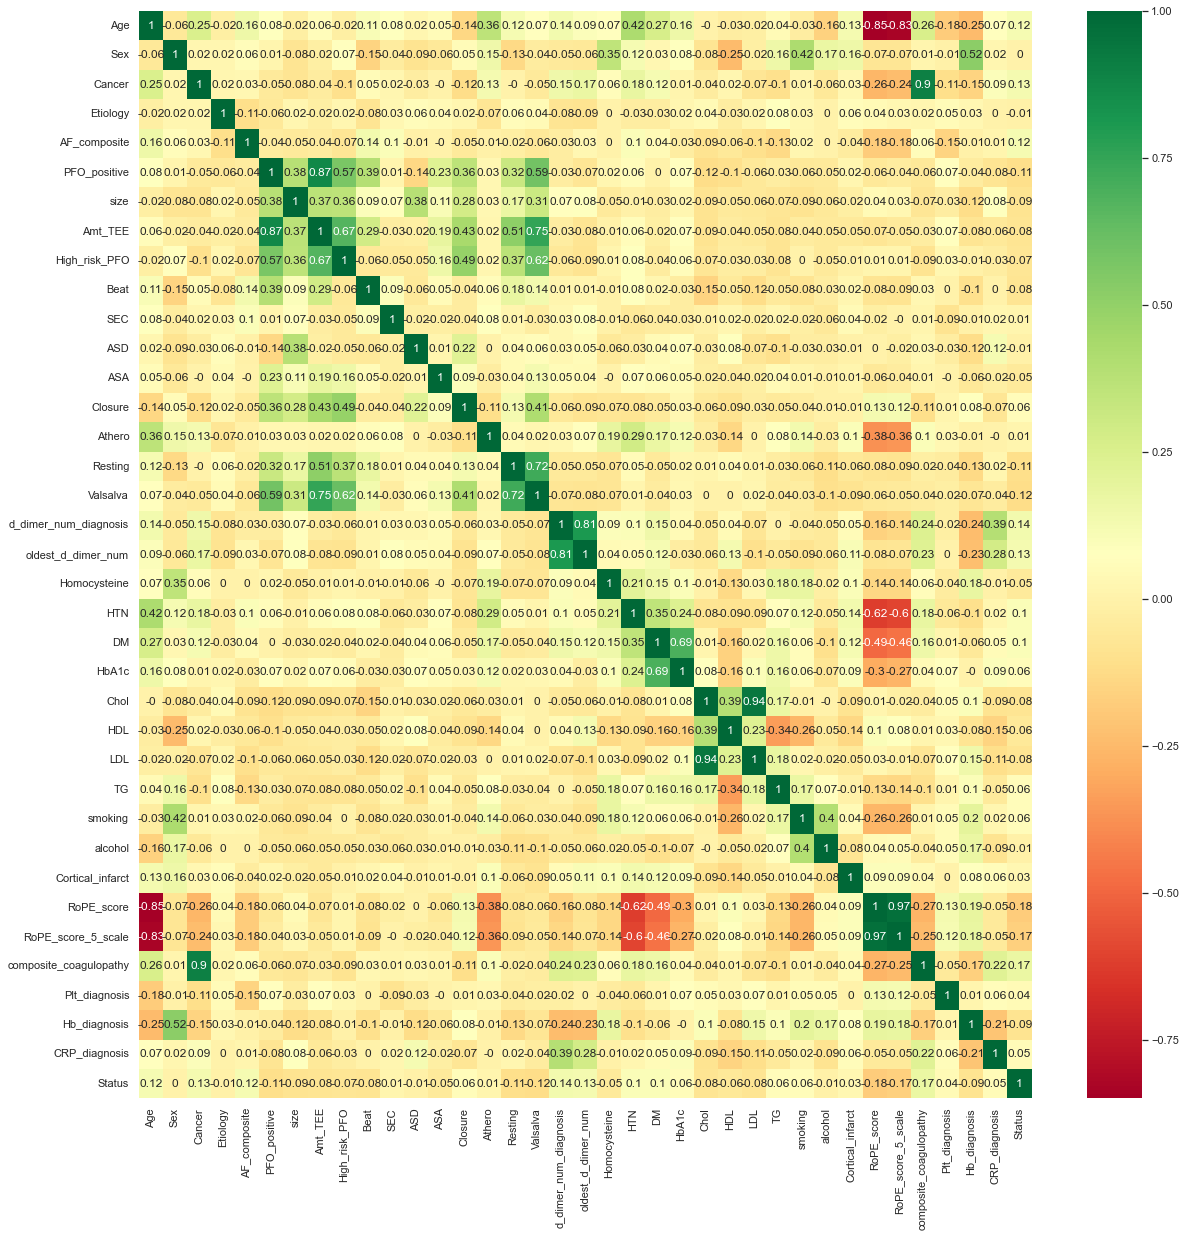

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
feature1=feature
feature1['Status']=label['Status']

sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(feature1.corr().round(2),cmap='RdYlGn', annot=True)
plt.savefig('feature_corr_heatmap.png')

In [73]:
feature.drop('Status',axis=1,inplace=True)

#**Classifier Model selecting for RFE**

In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest,GradientBoostingSurvivalAnalysis
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import RidgeClassifier

In [75]:
#RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20, min_samples_split=10,min_samples_leaf=1,max_features='log2',random_state=10)
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,random_state=10)
rfc.fit(X_train,y_train)
rfc_score=rfc.score(X_test,y_test)

print(rfc_score)


0.8924731182795699


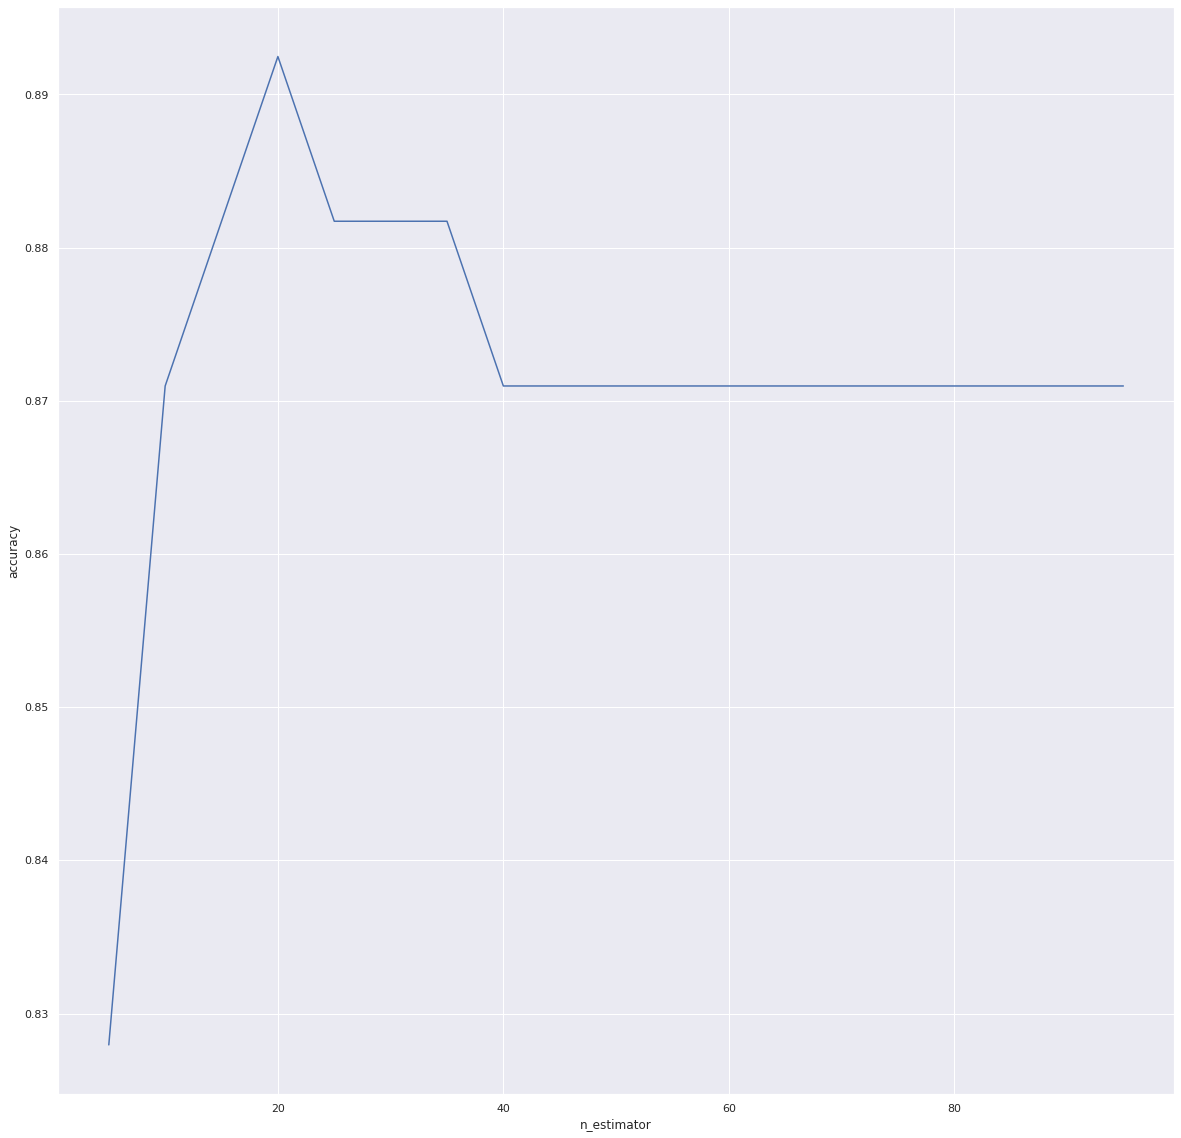

In [ ]:
scores_rfc = {}
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,random_state=10)

rfc_ls =RandomForestClassifier( min_samples_split=10,min_samples_leaf=1,max_features='log2',random_state=10)
for i in range(1, 20):
    n_estimators = i * 5
    rfc_ls.set_params(n_estimators=n_estimators)
    rfc_ls.fit(X_train, y_train)
    scores_rfc[n_estimators] = rfc_ls.score(X_test, y_test)
x, y = zip(*scores_rfc.items())
plt.plot(x, y)
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.grid(True);

In [ ]:
scores_rfc

{5: 0.8279569892473119,
 10: 0.8709677419354839,
 15: 0.8817204301075269,
 20: 0.8924731182795699,
 25: 0.8817204301075269,
 30: 0.8817204301075269,
 35: 0.8817204301075269,
 40: 0.8709677419354839,
 45: 0.8709677419354839,
 50: 0.8709677419354839,
 55: 0.8709677419354839,
 60: 0.8709677419354839,
 65: 0.8709677419354839,
 70: 0.8709677419354839,
 75: 0.8709677419354839,
 80: 0.8709677419354839,
 85: 0.8709677419354839,
 90: 0.8709677419354839,
 95: 0.8709677419354839}

In [76]:
#GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1, n_estimators=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=5)
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.3, random_state=10)
gbc.fit(X_train,y_train)
pred=gbc.predict(X_test)
score=accuracy_score(pred,y_test)
print(score)

0.8848920863309353


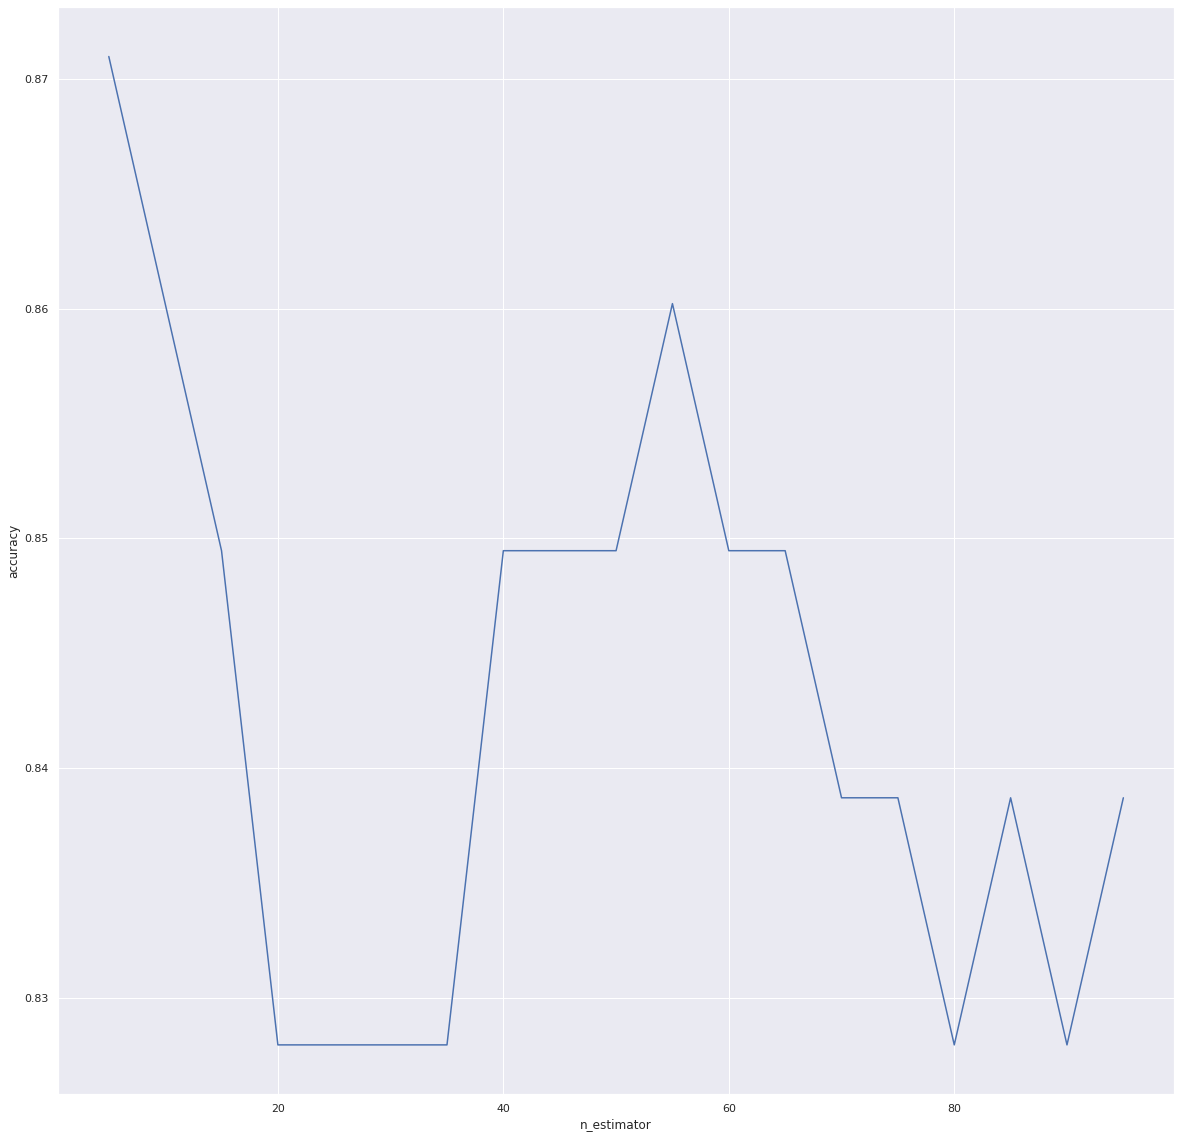

In [ ]:
scores_gbc = {}
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,random_state=10)

gbc_ls =GradientBoostingClassifier(learning_rate=0.1, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=5)
for i in range(1, 20):
    n_estimators = i * 5
    gbc_ls.set_params(n_estimators=n_estimators)
    gbc_ls.fit(X_train, y_train)
    scores_gbc[n_estimators] = gbc_ls.score(X_test, y_test)
x, y = zip(*scores_gbc.items())
plt.plot(x, y)
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.grid(True);

In [ ]:
scores_gbc

{5: 0.8709677419354839,
 10: 0.8602150537634409,
 15: 0.8494623655913979,
 20: 0.8279569892473119,
 25: 0.8279569892473119,
 30: 0.8279569892473119,
 35: 0.8279569892473119,
 40: 0.8494623655913979,
 45: 0.8494623655913979,
 50: 0.8494623655913979,
 55: 0.8602150537634409,
 60: 0.8494623655913979,
 65: 0.8494623655913979,
 70: 0.8387096774193549,
 75: 0.8387096774193549,
 80: 0.8279569892473119,
 85: 0.8387096774193549,
 90: 0.8279569892473119,
 95: 0.8387096774193549}

In [77]:
#RidgeClassifier
ridge=RidgeClassifier(alpha=0.01, max_iter=1100, tol=0.0001, random_state=10)
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.3,random_state=10)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
score=accuracy_score(ridge_pred,y_test)
print(score)

0.8848920863309353


In [27]:
#Support Vector Machine Classifier
svc=svm.SVC(kernel='rbf',max_iter=-1,random_state=10)
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.3,random_state=10)
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
svc_score=accuracy_score(svc_pred,y_test)
print(svc_score)

0.8848920863309353


In [30]:
from sklearn.linear_model import LogisticRegression
clf_lr=LogisticRegression(penalty='l2',  tol=0.0001, C=1.0, fit_intercept=True,
                          intercept_scaling=1, class_weight=None, random_state=10, solver='lbfgs',
                          max_iter=1000, multi_class='auto', verbose=0, n_jobs=-1, l1_ratio=None)
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,random_state=10)
clf_lr.fit(X_train,y_train)
lr_pred=clf_lr.predict(X_test)
lr_score=accuracy_score(lr_pred,y_test)
print(lr_score)

0.8709677419354839


#**Survival Analysis Model**

In [78]:
#RandomSurvivalForest
rsf=RandomSurvivalForest(n_estimators=26,max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
X_tr,X_te,y_tr,y_te=train_test_split(feature,st_label,test_size=0.2,random_state=10)
rsf.fit(X_tr,y_tr)
rsf_c_index=rsf.score(X_te,y_te)
print(rsf_c_index)

0.8257142857142857


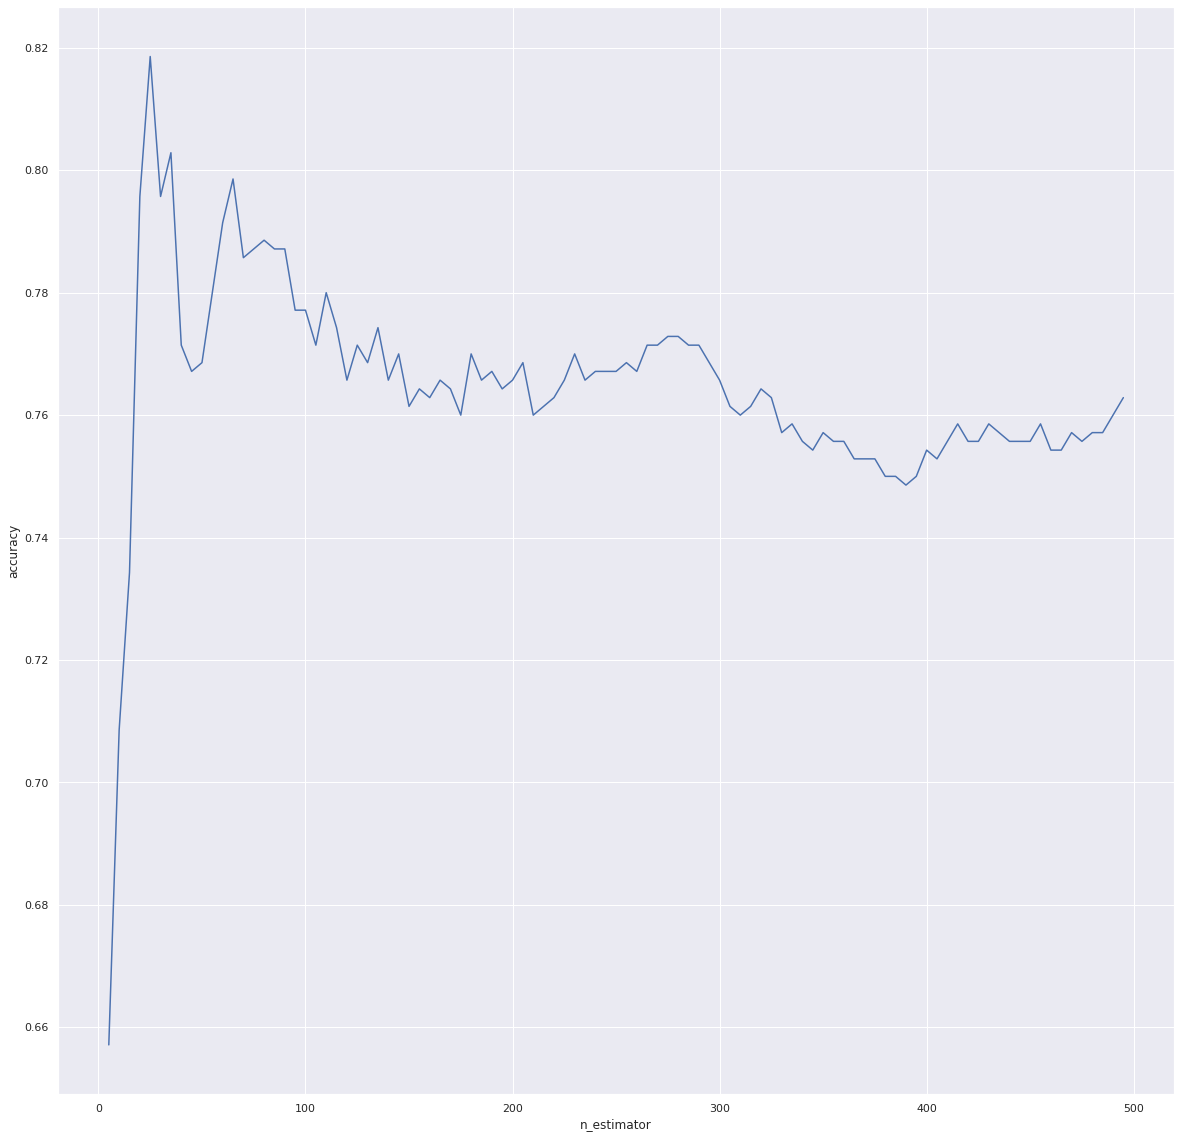

In [ ]:
scores_rsf = {}
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.2,random_state=10)

rsf_ls = RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
for i in range(1,100):
    n_estimators = i * 5
    rsf_ls.set_params(n_estimators=n_estimators)
    rsf_ls.fit(X_train, y_train)
    scores_rsf[n_estimators] = rsf_ls.score(X_test, y_test)
x, y = zip(*scores_rsf.items())
plt.plot(x, y)
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.grid(True);


In [ ]:
scores_rsf

{5: 0.6571428571428571,
 10: 0.7085714285714285,
 15: 0.7342857142857143,
 20: 0.7957142857142857,
 25: 0.8185714285714286,
 30: 0.7957142857142857,
 35: 0.8028571428571428,
 40: 0.7714285714285715,
 45: 0.7671428571428571,
 50: 0.7685714285714286,
 55: 0.78,
 60: 0.7914285714285715,
 65: 0.7985714285714286,
 70: 0.7857142857142857,
 75: 0.7871428571428571,
 80: 0.7885714285714286,
 85: 0.7871428571428571,
 90: 0.7871428571428571,
 95: 0.7771428571428571,
 100: 0.7771428571428571,
 105: 0.7714285714285715,
 110: 0.78,
 115: 0.7742857142857142,
 120: 0.7657142857142857,
 125: 0.7714285714285715,
 130: 0.7685714285714286,
 135: 0.7742857142857142,
 140: 0.7657142857142857,
 145: 0.77,
 150: 0.7614285714285715,
 155: 0.7642857142857142,
 160: 0.7628571428571429,
 165: 0.7657142857142857,
 170: 0.7642857142857142,
 175: 0.76,
 180: 0.77,
 185: 0.7657142857142857,
 190: 0.7671428571428571,
 195: 0.7642857142857142,
 200: 0.7657142857142857,
 205: 0.7685714285714286,
 210: 0.76,
 215: 0.7614

In [33]:
#GradientBoostingSurvivalAnalysis
est_cph_tree = GradientBoostingSurvivalAnalysis(
    n_estimators=1900, learning_rate=1.0, max_depth=5, random_state=10, loss= 'coxph')
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.3,random_state=10)
est_cph_tree.fit(X_train, y_train)
gb_c_index = est_cph_tree.score(X_test, y_test)
print(gb_c_index)

0.8152948801036941


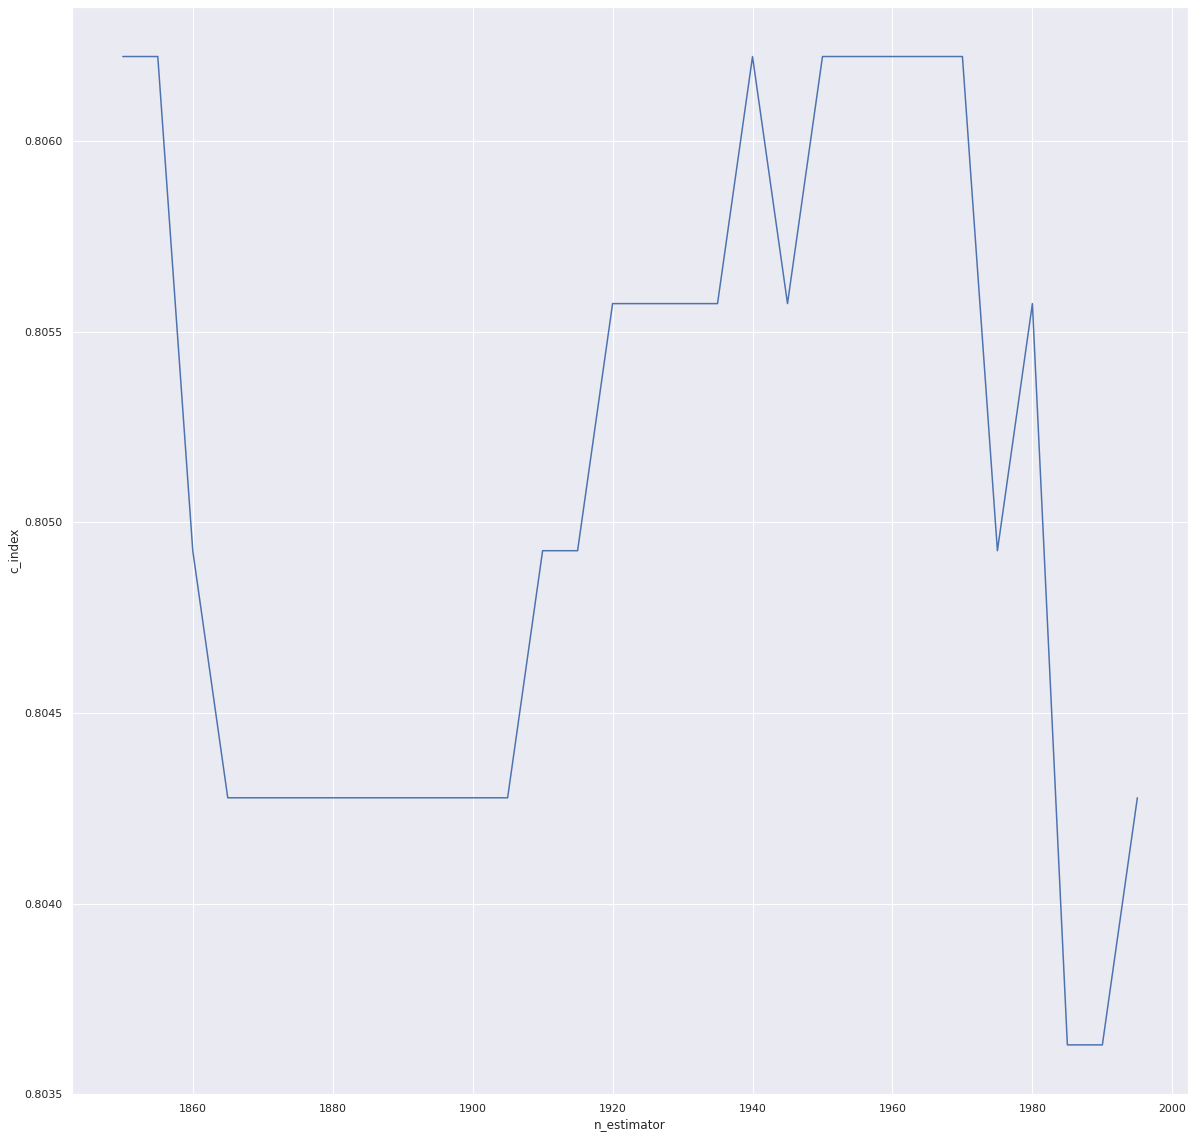

In [ ]:
scores_cph_tree = {}
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.3,random_state=10)

cph_tree_ls = GradientBoostingSurvivalAnalysis( learning_rate=1.0, max_depth=5, random_state=5, loss= 'coxph')
for i in range(370, 400):
    n_estimators = i * 5
    cph_tree_ls.set_params(n_estimators=n_estimators)
    cph_tree_ls.fit(X_train, y_train)
    scores_cph_tree[n_estimators] = cph_tree_ls.score(X_test, y_test)
x, y = zip(*scores_cph_tree.items())
plt.plot(x, y)
plt.xlabel('n_estimator')
plt.ylabel('c_index')
plt.grid(True);

In [23]:
scores_cph_tree

NameError: ignored

In [34]:
#CoxnetSurvivalAnalysis
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
cox_lasso=CoxnetSurvivalAnalysis(n_alphas=130,alpha_min_ratio=0.01,l1_ratio=0.01,fit_baseline_model=True, max_iter=2500,normalize=True,
                                 tol=1e-06)
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.3,random_state=10)
cox_lasso.fit(X_train,y_train)
cox_lasso_score=cox_lasso.score(X_test,y_test)
print(cox_lasso_score)

0.6827608554763448


In [35]:
#ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
component_surv=ComponentwiseGradientBoostingSurvivalAnalysis(loss='coxph', learning_rate=0.1, n_estimators=800, subsample=1.0, dropout_rate=0.3, random_state=10)
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.2,random_state=10)
component_surv.fit(X_train,y_train)
component_c_index=component_surv.score(X_test,y_test)
print(component_c_index)

0.6807142857142857


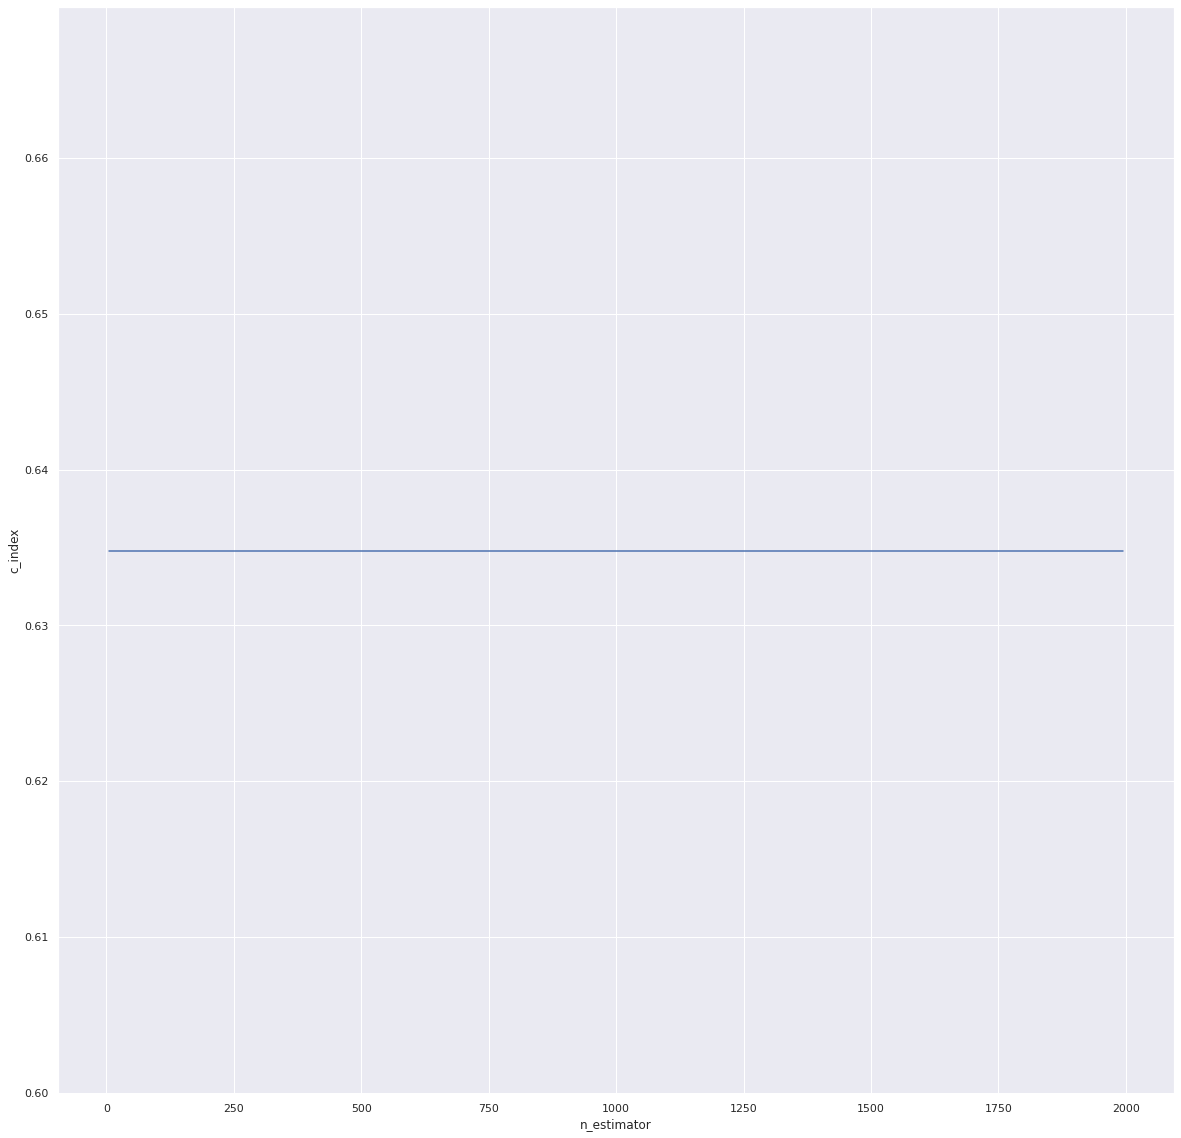

In [ ]:
scores_compose_gradientboost = {}
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.3,random_state=10)

component_gradientboost_ls = ComponentwiseGradientBoostingSurvivalAnalysis(loss='coxph', learning_rate=0.1, subsample=1.0, dropout_rate=0.3, random_state=10)
for i in range(1, 400):
    n_estimators = i * 5
    component_gradientboost_ls.set_params(n_estimators=n_estimators)
    component_gradientboost_ls.fit(X_train, y_train)
    scores_compose_gradientboost[n_estimators] = component_gradientboost_ls.score(X_test, y_test)
x, y = zip(*scores_compose_gradientboost.items())
plt.plot(x, y)
plt.xlabel('n_estimator')
plt.ylabel('c_index')
plt.grid(True);

In [36]:
#ExtraSurvivalTrees
from sksurv.ensemble import ExtraSurvivalTrees
extra_surv=ExtraSurvivalTrees(n_estimators=25, max_depth=5, min_samples_split=8, 
                              min_samples_leaf=1, min_weight_fraction_leaf=0, max_features='log2')
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.3,random_state=10)
extra_surv.fit(X_train,y_train)
extra_score=extra_surv.score(X_test,y_test)
print(extra_score)

0.6740116655865198


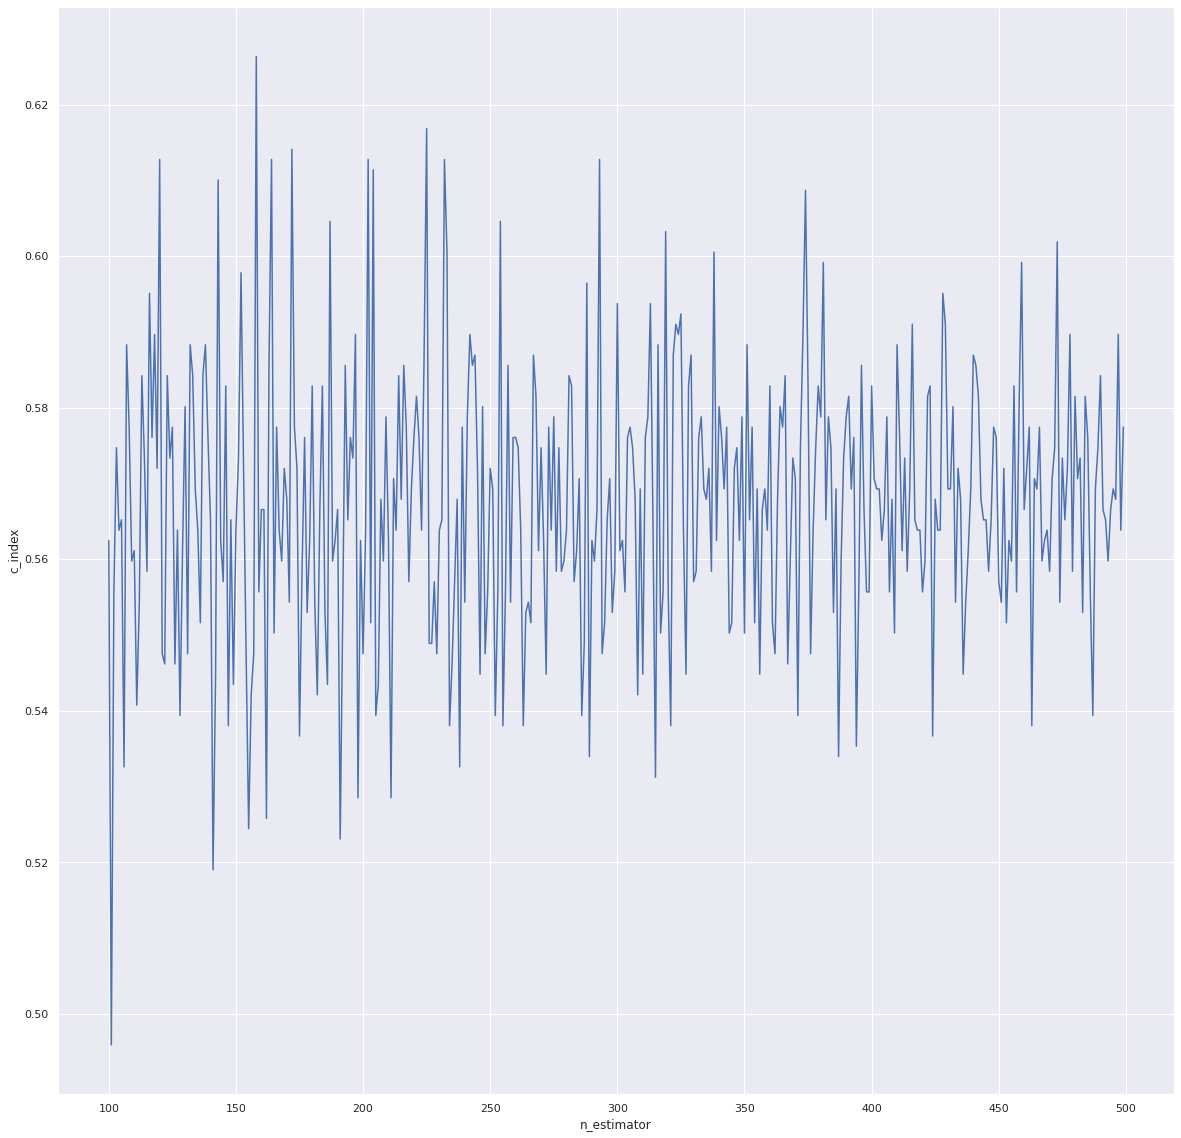

In [ ]:
scores_ex_tree = {}
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.2,random_state=0)

ex_tree_ls = ExtraSurvivalTrees(max_depth=5, min_samples_split=8, min_samples_leaf=1, min_weight_fraction_leaf=0, max_features='log2')
for i in range(100, 500):
    n_estimators = i 
    ex_tree_ls.set_params(n_estimators=n_estimators)
    ex_tree_ls.fit(X_train, y_train)
    scores_ex_tree[n_estimators] = ex_tree_ls.score(X_test, y_test)
x, y = zip(*scores_ex_tree.items())
plt.plot(x, y)
plt.xlabel('n_estimator')
plt.ylabel('c_index')
plt.grid(True);


In [ ]:
scores_ex_tree

{1: 0.6335714285714286,
 2: 0.5935714285714285,
 3: 0.66,
 4: 0.6757142857142857,
 5: 0.6992857142857143,
 6: 0.5692857142857143,
 7: 0.5228571428571429,
 8: 0.5985714285714285,
 9: 0.7057142857142857,
 10: 0.6964285714285714,
 11: 0.6985714285714286,
 12: 0.7007142857142857,
 13: 0.7221428571428572,
 14: 0.6942857142857143,
 15: 0.7514285714285714,
 16: 0.7585714285714286,
 17: 0.6242857142857143,
 18: 0.7342857142857143,
 19: 0.7557142857142857,
 20: 0.6557142857142857,
 21: 0.68,
 22: 0.7442857142857143,
 23: 0.7271428571428571,
 24: 0.7385714285714285,
 25: 0.7557142857142857,
 26: 0.63,
 27: 0.6628571428571428,
 28: 0.7157142857142857,
 29: 0.6757142857142857,
 30: 0.67,
 31: 0.6942857142857143,
 32: 0.7314285714285714,
 33: 0.7342857142857143,
 34: 0.7342857142857143,
 35: 0.72,
 36: 0.6971428571428572,
 37: 0.7657142857142857,
 38: 0.7628571428571429,
 39: 0.7042857142857143,
 40: 0.7457142857142857,
 41: 0.6728571428571428,
 42: 0.7285714285714285,
 43: 0.7571428571428571,
 44:

In [ ]:
from sksurv.svm import FastSurvivalSVM
from sksurv.metrics import concordance_index_censored
from sklearn.model_selection import ShuffleSplit, GridSearchCV

estimator = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=0,verbose=1)
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['Status'], y['Duration'], prediction)
    return result[0]

param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
cv = ShuffleSplit(n_splits=100, test_size=0.5, random_state=0)
gcv = GridSearchCV(estimator, param_grid, scoring=score_survival_model, 
                   n_jobs=4, refit=False, 
                   cv=cv)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
gcv = gcv.fit(feature, st_label)
round(gcv.best_score_, 3), gcv.best_params_

(0.615, {'alpha': 0.000244140625})

In [37]:
from sksurv.tree import SurvivalTree
surv_tree=SurvivalTree(splitter='best', max_depth=None, min_samples_split=4, min_samples_leaf=6, min_weight_fraction_leaf=0.0, max_features='log2', random_state=10)
X_train,X_test,y_train,y_test=train_test_split(feature,st_label,test_size=0.2,random_state=10)
surv_tree.fit(X_train,y_train)
surv_tree_score=surv_tree.score(X_test,y_test)
print(surv_tree_score)

0.6014285714285714


#**RFE로 feature selecting**

#**1. Selector-RandomForest**

1
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False]
[35 30 10 29  2  4 13 12 15 21 22 18  5  3  6 16  9 23 28 25 14 17 26 32
 36 33 34 20 24 11  7  8  1 31 19 27]
[32]
Index(['composite_coagulopathy'], dtype='object')
0.6807142857142857
5
2
[False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False]
[34 29  9 28  1  3 12 11 14 20 21 17  4  2  5 15  8 22 27 24 13 16 25 31
 35 32 33 19 23 10  6  7  1 30 18 26]
[4, 32]
Index(['AF_composite', 'composite_coagulopathy'], dtype='object')
0.6464285714285715
5
3
[False False False False  True False False False False False False False
 False  True False False False False False False False False False False
 False False Fa

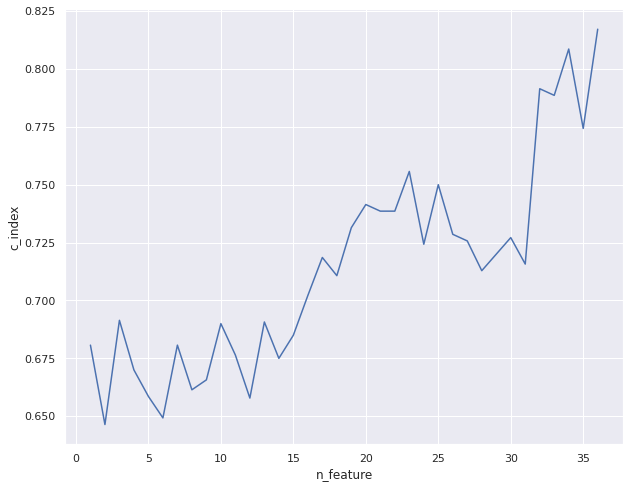

In [24]:
#logisticregression-randomsurvivalforest
from sklearn.feature_selection import RFE
n=0
log_rsf_c_index_list=[]
for c in range(1,len(feature.columns)+1):
  globals()["rsf_{}_list".format(c)]=[]
  n+=1
  rfe=RFE(estimator=clf_lr,n_features_to_select=c,importance_getter='auto')
  rfe.fit(feature,label1)
  print(n)
  print(rfe.support_)
  print(rfe.ranking_)
  print(list(np.where(rfe.ranking_==1)[0]))

  selected_columns=feature.columns[list(np.where(rfe.ranking_==1)[0])]
  selected_feature=feature[selected_columns]
  print(selected_feature.columns)

  for i in range(1,100):
    n_estimators=i*5
                                                                 #n_estimator 중에서 best를 찾습니다.
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  log_rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(log_rsf_c_index_list), log_rsf_c_index_list.index(max(log_rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, log_rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

In [ ]:
#GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1, n_estimators=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=5)
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.3, random_state=10)
gbc.fit(X_train,y_train)
pred=gbc.predict(X_test)
score=accuracy_score(pred,y_test)
print(score)

1
[False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False]
[ 9 24 33 25 17 30 10 23 31 21 34 36 35 16 18 29 15  1 11  3 20 22 12  2
  7 13  8 27 28 32  5 26 19  4  6 14]
[17]
Index(['d_dimer_num_diagnosis'], dtype='object')
0.6657142857142857
50
2
[False False False False False False False False False False False False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False]
[10 23 30 21 14 32  9 22 31 15 33 34 35 16 19 25 20  1 11  2 18 24  8  1
  5 13  7 27 26 29  6 28 17  3  4 12]
[17, 23]
Index(['d_dimer_num_diagnosis', 'Chol'], dtype='object')
0.6792857142857143
30
3
[False False False False False False False False False False False False
 False False False False False  True False  True False False False False
 False False  True Fal

14
[ True False False False False False  True False False False False False
 False False False False False  True  True  True False False  True  True
  True  True  True False False False  True False False  True  True  True]
[ 1 10 19 11  4 14  1  9 20  8 21 23 22  3  5 13  2  1  1  1  7 12  1  1
  1  1  1 15 16 18  1 17  6  1  1  1]
[0, 6, 17, 18, 19, 22, 23, 24, 25, 26, 30, 33, 34, 35]
Index(['Age', 'size', 'd_dimer_num_diagnosis', 'oldest_d_dimer_num',
       'Homocysteine', 'HbA1c', 'Chol', 'HDL', 'LDL', 'TG', 'RoPE_score',
       'Plt_diagnosis', 'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.7828571428571428
145
15
[ True False False False  True False  True False False False False False
 False False False False False  True  True  True False False  True  True
  True  True  True False False False  True False False  True  True  True]
[ 1 11 18 14  1 15  1  8 19  2 20 22 21  3  5 12  7  1  1  1  6  9  1  1
  1  1  1 16 13 17  1 10  4  1  1  1]
[0, 4, 6, 17, 18, 19, 22, 23, 2

0.78
155
24
[ True  True False False  True False  True  True False  True False False
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True False False False  True False  True  True  True  True]
[ 1  1  9  2  1  8  1  1 10  1 11 13 12  1  1  3  1  1  1  1  1  1  1  1
  1  1  1  6  4  7  1  5  1  1  1  1]
[0, 1, 4, 6, 7, 9, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 32, 33, 34, 35]
Index(['Age', 'Sex', 'AF_composite', 'size', 'Amt_TEE', 'Beat', 'Closure',
       'Athero', 'Valsalva', 'd_dimer_num_diagnosis', 'oldest_d_dimer_num',
       'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol', 'HDL', 'LDL', 'TG',
       'RoPE_score', 'composite_coagulopathy', 'Plt_diagnosis', 'Hb_diagnosis',
       'CRP_diagnosis'],
      dtype='object')
0.7871428571428571
320
25
[ True  True False  True  True False  True  True False  True False False
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True False False False  True 

0.7857142857142857
35
33
[ True  True  True  True  True  True  True  True  True  True False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 2 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'Closure', 'Athero',
       'Resting', 'Valsalva', 'd_dimer_num_diagnosis', 'oldest_d_dimer_num',
       'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol', 'HDL', 'LDL', 'TG',
       'smoking', 'alcohol', 'Cortical_infarct', 'RoPE_score',
       'RoPE_score_5_scale', 'composite_coagulopathy', 'Plt_diagnosis',
       'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.8128571428571428
30
34
[ True  True  True  True  True  True  

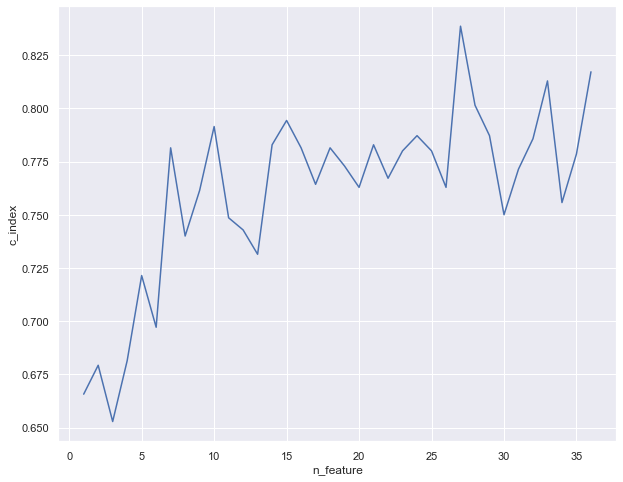

In [59]:
#gradientboostingclassifier-randomsurvivalforest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
n=0
rsf_c_index_list=[]
clf_gb=GradientBoostingClassifier(learning_rate=0.1, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=5)
for c in range(1,len(feature.columns)+1):
  globals()["rsf_{}_list".format(c)]=[]
  globals()['rsf_best_estimator_{}'.format(c)]={}
  globals()
  n+=1

#RFE에 사용할 Classifier의 최적의 estimator를 찾습니다.
  for x in range(1,50):                                   
    clf_gb_estimator=x*5
    clf_gb.set_params(n_estimators=clf_gb_estimator)
    rfe=RFE(estimator=clf_gb,n_features_to_select=c,importance_getter='auto')
    X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.3,random_state=10)
    rfe.fit(X_train,y_train)
    score=rfe.score(X_test,y_test)
    globals()['rsf_best_estimator_{}'.format(c)][clf_gb_estimator]=score
  reversed_dic=dict(map(reversed,globals()['rsf_best_estimator_{}'.format(c)].items()))
  max_estimator=max(reversed_dic.values())
  
  clf_gb.set_params(n_estimators=max_estimator)
  rfe=RFE(estimator=clf_gb,n_features_to_select=c,importance_getter='auto')
  rfe.fit(feature,label1)
  print(n)
  print(rfe.support_)
  print(rfe.ranking_)
  print(list(np.where(rfe.ranking_==1)[0]))

  selected_columns=feature.columns[list(np.where(rfe.ranking_==1)[0])]
  selected_feature=feature[selected_columns]
  print(selected_feature.columns)

#n_estimator 중에서 best를 찾습니다.
  for i in range(1,100):
    n_estimators=i*5
                                                                  
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

1
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False]
[ 6 31 23 22 19 27 13 24 33 25 34 35 36 18 21 20 16  2  7  1 26 28  9  3
 10 12  4 30 32 29 11 17 15  8  5 14]
[19]
Index(['Homocysteine'], dtype='object')
0.6171428571428571
5
2
[False False False False False False False False False False False False
 False False False False False  True False  True False False False False
 False False False False False False False False False False False False]
[ 5 30 22 21 18 26 12 23 32 24 33 34 35 17 20 19 15  1  6  1 25 27  8  2
  9 11  3 29 31 28 10 16 14  7  4 13]
[17, 19]
Index(['d_dimer_num_diagnosis', 'Homocysteine'], dtype='object')
0.6464285714285715
140
3
[False False False False False False False False False False False False
 False False False False False  True False  True False False False  True
 False False False Fals

14
[ True False False False False False  True False False False False False
 False False False False False  True  True  True False False  True  True
  True  True  True False False False  True False False  True  True  True]
[ 1 18 10  9  6 14  1 11 20 12 21 22 23  5  8  7  3  1  1  1 13 15  1  1
  1  1  1 17 19 16  1  4  2  1  1  1]
[0, 6, 17, 18, 19, 22, 23, 24, 25, 26, 30, 33, 34, 35]
Index(['Age', 'size', 'd_dimer_num_diagnosis', 'oldest_d_dimer_num',
       'Homocysteine', 'HbA1c', 'Chol', 'HDL', 'LDL', 'TG', 'RoPE_score',
       'Plt_diagnosis', 'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.7828571428571428
145
15
[ True False False False False False  True False False False False False
 False False False False False  True  True  True False False  True  True
  True  True  True False False False  True False  True  True  True  True]
[ 1 17  9  8  5 13  1 10 19 11 20 21 22  4  7  6  2  1  1  1 12 14  1  1
  1  1  1 16 18 15  1  3  1  1  1  1]
[0, 6, 17, 18, 19, 22, 23, 24, 

0.78
490
24
[ True False  True  True  True False  True  True False False False False
 False  True  True  True  True  True  True  True False False  True  True
  True  True  True False False False  True  True  True  True  True  True]
[ 1  8  1  1  1  4  1  1 10  2 11 12 13  1  1  1  1  1  1  1  3  5  1  1
  1  1  1  7  9  6  1  1  1  1  1  1]
[0, 2, 3, 4, 6, 7, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35]
Index(['Age', 'Cancer', 'Etiology', 'AF_composite', 'size', 'Amt_TEE',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HbA1c', 'Chol', 'HDL', 'LDL',
       'TG', 'RoPE_score', 'RoPE_score_5_scale', 'composite_coagulopathy',
       'Plt_diagnosis', 'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.7828571428571428
35
25
[ True False  True  True  True False  True  True False  True False False
 False  True  True  True  True  True  True  True False False  True  True
  True  True  Tru

0.7857142857142857
35
33
[ True  True  True  True  True  True  True  True  True  True False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 2 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'Closure', 'Athero',
       'Resting', 'Valsalva', 'd_dimer_num_diagnosis', 'oldest_d_dimer_num',
       'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol', 'HDL', 'LDL', 'TG',
       'smoking', 'alcohol', 'Cortical_infarct', 'RoPE_score',
       'RoPE_score_5_scale', 'composite_coagulopathy', 'Plt_diagnosis',
       'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.8128571428571428
30
34
[ True  True  True  True  True  True  

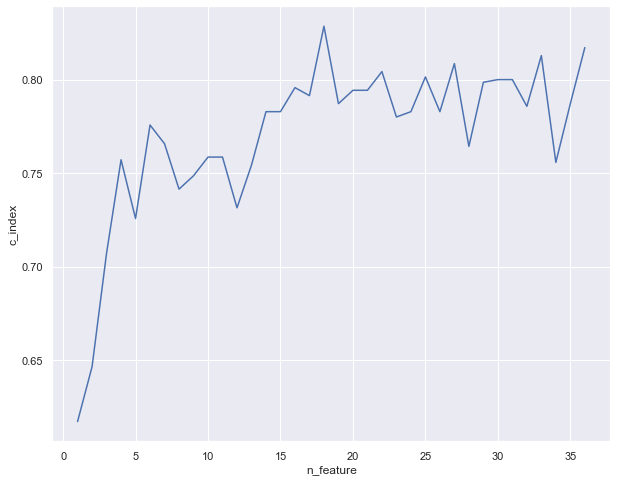

In [39]:
#randomforest-randomsurvivalforest
from sklearn.feature_selection import RFE
n=0
rsf_c_index_list=[]
rfc =RandomForestClassifier( min_samples_split=10,min_samples_leaf=1,max_features='log2',random_state=10)
for c in range(1,len(feature.columns)+1):
  globals()["rsf_{}_list".format(c)]=[]
  globals()['rsf_best_estimator_{}'.format(c)]={}
  globals()
  n+=1

#RFE에 사용할 Classifier의 최적의 estimator를 찾습니다.
  for x in range(1,50):                                   
    rfc_estimator=x*5
    rfc.set_params(n_estimators=rfc_estimator)
    rfe=RFE(estimator=rfc,n_features_to_select=c,importance_getter='auto')
    X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,random_state=10)
    rfe.fit(X_train,y_train)
    score=rfe.score(X_test,y_test)
    globals()['rsf_best_estimator_{}'.format(c)][rfc_estimator]=score
  reversed_dic=dict(map(reversed,globals()['rsf_best_estimator_{}'.format(c)].items()))
  max_estimator=max(reversed_dic.values())
  
  rfc.set_params(n_estimators=max_estimator)
  rfe=RFE(estimator=rfc,n_features_to_select=c,importance_getter='auto')
  rfe.fit(feature,label1)
  print(n)
  print(rfe.support_)
  print(rfe.ranking_)
  print(list(np.where(rfe.ranking_==1)[0]))

  selected_columns=feature.columns[list(np.where(rfe.ranking_==1)[0])]
  selected_feature=feature[selected_columns]
  print(selected_feature.columns)

#n_estimator 중에서 best를 찾습니다.
  for i in range(1,100):
    n_estimators=i*5
                                                                  
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

In [83]:
#RidgeClassifier
from sklearn.model_selection import KFold,GridSearchCV
param_grid = {
    'max_iter': np.arange(600,1200),
    'random_state': [5,6,7,8,9,10],
    'tol': [0.0001,0.001,0.01, 0.1],
    'alpha':[1,0.1,0.01,0.001]
}
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )
estimator=RidgeClassifier()
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,random_state=10)
grid_search.fit(X_train, y_train)
print('grid_search.best_params_: ',grid_search.best_params_)

Fitting 10 folds for each of 57600 candidates, totalling 576000 fits
grid_search.best_params_:  {'alpha': 0.1, 'max_iter': 600, 'random_state': 5, 'tol': 0.0001}


1
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False]
[ 3 25 21 24 16 29 14 26 32 18 36 35 33 20 23 22 15  2  6  1 31 30  7  4
  5  9 11 28 34 27 10 19 17  8 13 12]
[19]
Index(['Homocysteine'], dtype='object')
0.6171428571428571
5
2
[False False False False False False False False False False False False
 False False False False False  True False  True False False False False
 False False False False False False False False False False False False]
[ 2 24 20 23 15 28 13 25 31 17 35 34 32 19 22 21 14  1  5  1 30 29  6  3
  4  8 10 27 33 26  9 18 16  7 12 11]
[17, 19]
Index(['d_dimer_num_diagnosis', 'Homocysteine'], dtype='object')
0.6464285714285715
140
3
[ True False False False False False False False False False False False
 False False False False False  True False  True False False False False
 False False False Fals

14
[ True False False False False False  True False False False False False
 False False False False False  True  True  True False False  True  True
  True  True  True False False False  True False False  True  True  True]
[ 1 12  8 11  3 16  1 13 19  5 23 22 20  7 10  9  2  1  1  1 18 17  1  1
  1  1  1 15 21 14  1  6  4  1  1  1]
[0, 6, 17, 18, 19, 22, 23, 24, 25, 26, 30, 33, 34, 35]
Index(['Age', 'size', 'd_dimer_num_diagnosis', 'oldest_d_dimer_num',
       'Homocysteine', 'HbA1c', 'Chol', 'HDL', 'LDL', 'TG', 'RoPE_score',
       'Plt_diagnosis', 'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.7828571428571428
145
15
[ True False False False False False  True False False False False False
 False False False False  True  True  True  True False False  True  True
  True  True  True False False False  True False False  True  True  True]
[ 1 11  7 10  2 15  1 12 18  4 22 21 19  6  9  8  1  1  1  1 17 16  1  1
  1  1  1 14 20 13  1  5  3  1  1  1]
[0, 6, 16, 17, 18, 19, 22, 23, 

0.7814285714285715
415
24
[ True False  True  True  True False  True False False  True False False
 False  True  True  True  True  True  True  True False False  True  True
  True  True  True False False False  True  True  True  True  True  True]
[ 1  2  1  1  1  6  1  3  9  1 13 12 10  1  1  1  1  1  1  1  8  7  1  1
  1  1  1  5 11  4  1  1  1  1  1  1]
[0, 2, 3, 4, 6, 9, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35]
Index(['Age', 'Cancer', 'Etiology', 'AF_composite', 'size', 'Beat', 'Closure',
       'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HbA1c', 'Chol', 'HDL', 'LDL',
       'TG', 'RoPE_score', 'RoPE_score_5_scale', 'composite_coagulopathy',
       'Plt_diagnosis', 'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.7885714285714286
35
25
[ True  True  True  True  True False  True False False  True False False
 False  True  True  True  True  True  True  True False False  True  True
  True

0.7771428571428571
25
33
[ True  True  True  True  True  True  True  True  True  True False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35]
Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'ASA', 'Closure', 'Athero',
       'Resting', 'Valsalva', 'd_dimer_num_diagnosis', 'oldest_d_dimer_num',
       'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol', 'HDL', 'LDL', 'TG',
       'smoking', 'Cortical_infarct', 'RoPE_score', 'RoPE_score_5_scale',
       'composite_coagulopathy', 'Plt_diagnosis', 'Hb_diagnosis',
       'CRP_diagnosis'],
      dtype='object')
0.7685714285714286
440
34
[ True  True  True  True  True  True  Tru

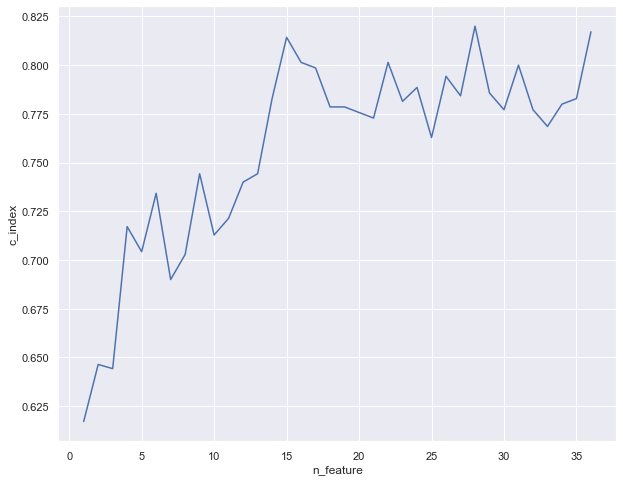

In [86]:
#RidgeClassifier-RandomSurvivalForest
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeClassifier
n=0
rsf_c_index_list=[]
clf_ridge=RidgeClassifier(alpha=0.1,random_state=5,tol=0.0001)
for c in range(1,len(feature.columns)+1):
  globals()["rsf_{}_list".format(c)]=[]
  globals()['rsf_best_estimator_{}'.format(c)]={}
  globals()
  n+=1

#RFE에 사용할 Classifier의 최적의 estimator를 찾습니다.
  for x in range(120,300):                                   
    ridge_iter=x*5
    clf_ridge.set_params(max_iter=ridge_iter)
    rfe=RFE(estimator=clf_ridge,n_features_to_select=c,importance_getter='auto')
    X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,random_state=10)
    rfe.fit(X_train,y_train)
    score=rfe.score(X_test,y_test)
    globals()['rsf_best_estimator_{}'.format(c)][rfc_estimator]=score
  reversed_dic=dict(map(reversed,globals()['rsf_best_estimator_{}'.format(c)].items()))
  max_estimator=max(reversed_dic.values())
  
  clf_ridge.set_params(max_iter=max_estimator)
  rfe=RFE(estimator=rfc,n_features_to_select=c,importance_getter='auto')
  rfe.fit(feature,label1)
  print(n)
  print(rfe.support_)
  print(rfe.ranking_)
  print(list(np.where(rfe.ranking_==1)[0]))

  selected_columns=feature.columns[list(np.where(rfe.ranking_==1)[0])]
  selected_feature=feature[selected_columns]
  print(selected_feature.columns)

#n_estimator 중에서 best를 찾습니다.
  for i in range(1,100):
    n_estimators=i*5
                                                                  
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

In [ ]:
#RidgeClassifier-RandomSurvivalForest
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeClassifier

In [109]:
#xgboostclassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(feature,label1,test_size=0.2,random_state=10)
kf = KFold(random_state=30, n_splits=10,shuffle=True)
param_grid = {
    'n_estimators': [500,600],
    'random_state': [5],
    'learning_rate': [0.01, 0.1],
    'max_depth':[1,2,3],
    'gamma':[0,0.5]
}
estimator=XGBClassifier()
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )
grid_search.fit(X_train, y_train)
print('grid_search.best_params_: ',grid_search.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


C:\Users\plays\anaconda3\envs\stroke_project\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:52:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
grid_search.best_params_:  {'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'random_state': 5}


In [110]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.get_params(grid_search.best_params_)
xgb.fit(X_train,y_train)
score=xgb.score(X_test,y_test)
print(score)

[16:52:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8494623655913979


In [ ]:
#XGBoostingClassifier-RandomSurvivalForest
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,GridSearchCV
import warnings
#warnings.filterwarnings('ignore')
n=0
rsf_c_index_list=[]
xgb=XGBClassifier(gamma= 0.5, learning_rate= 0.01, max_depth=3, n_estimators=500, random_state= 5)
for c in range(1,len(feature.columns)+1):
    globals()["rsf_{}_list".format(c)]=[]
    globals()['rsf_best_estimator_{}'.format(c)]={}
    n+=1
    
    rfe=RFE(estimator=xgb,n_features_to_select=c,importance_getter='auto')
    rfe.fit(feature,label1)
    print(n)
    print(rfe.support_)
    print(rfe.ranking_)
    print(list(np.where(rfe.ranking_==1)[0]))

    selected_columns=feature.columns[list(np.where(rfe.ranking_==1)[0])]
    selected_feature=feature[selected_columns]
    print(selected_feature.columns)

    #RandomSurvivalForest hyperparameter tuning
    kf = KFold(random_state=30, n_splits=10,shuffle=True)
    param_grid = {'n_estimators': [400,500,600,700],
                  'random_state': [5,10],
                  'min_samples_split': np.arange(1,11),
                  'max_features':['log2','sqrt','auto',None]
                 }
    kf = KFold(random_state=30, n_splits=10,shuffle=True)
    rsf=RandomSurvivalForest(max_depth=3)
    grid_search2 = GridSearchCV(estimator=rsf, param_grid=param_grid, cv=kf, n_jobs=-1)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    grid_search2.fit(selected_feature,st_label)
    rsf_best=grid_search2.best_params_
    print(rsf_best)
    
    #RandomSurvivalForest resetting
    rsf.set_params(grid_search_best_params_)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    rsf_c_index_list.append(rsf_c_index)

    print(rsf_c_index)
    print(grid_search_best_params_)

    print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

#**SelecKBest**

In [ ]:
#RandomSurvivalForest
from sksurv.metrics import integrated_brier_score
from sksurv.ensemble import RandomSurvivalForest
from sklearn.model_selection import train_test_split
rsf=RandomSurvivalForest(n_estimators=25,min_samples_split=10,min_samples_leaf=1,max_features='log2',random_state=10)
X_tr,X_te,y_tr,y_te=train_test_split(feature,st_label,test_size=0.2,random_state=10)
rsf.fit(X_tr,y_tr)
rsf_c_index=rsf.score(X_te,y_te)
print(rsf_c_index)

0.8228571428571428


Selected names:  Index(['TG'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol',
       'HDL', 'LDL', 'smoking', 'alcohol', 'Cortical_infarct', 'RoPE_score',
       'RoPE_score_5_scale', 'composite_coagulopathy', 'Plt_diagnosis',
       'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.5757142857142857
3
Selected names:  Index(['LDL', 'TG'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol',
       'HDL', 'smoking', 'alcoho

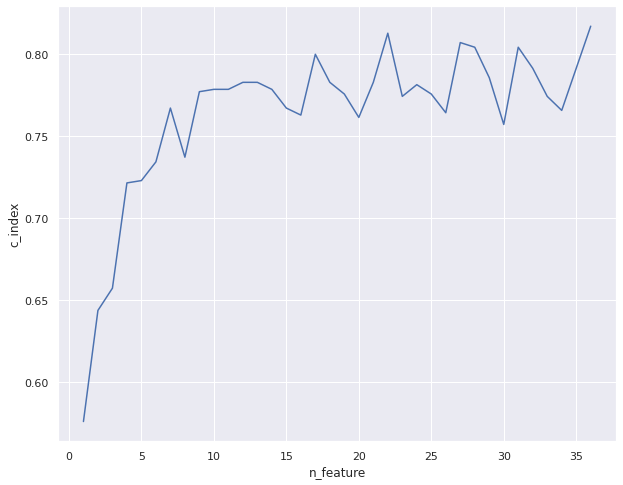

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression


n=0
rsf_c_index_list=[]

for c in range(1,len(feature.columns)+1):
  n+=1
  selectk=SelectKBest(chi2,k=c)
  globals()["rsf_{}_list".format(c)]=[]

  selected=selectk.fit_transform(feature,label1)
  all_names = feature.columns
  ## selector.get_support()
  selected_mask = selectk.get_support()
  ## 선택된 특성(변수)들
  selected_names = all_names[selected_mask]
  ## 선택되지 않은 특성(변수)들
  unselected_names = all_names[~selected_mask]
  print('Selected names: ', selected_names)
  print('Unselected names: ', unselected_names)

  selected_feature=feature[selected_names]

  for i in range(1,100):
    n_estimators=i*5
                                                                 #n_estimator 중에서 best를 찾습니다.
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

Selected names:  Index(['RoPE_score'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol',
       'HDL', 'LDL', 'TG', 'smoking', 'alcohol', 'Cortical_infarct',
       'RoPE_score_5_scale', 'composite_coagulopathy', 'Plt_diagnosis',
       'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.7171428571428572
55
Selected names:  Index(['RoPE_score', 'composite_coagulopathy'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol',
    

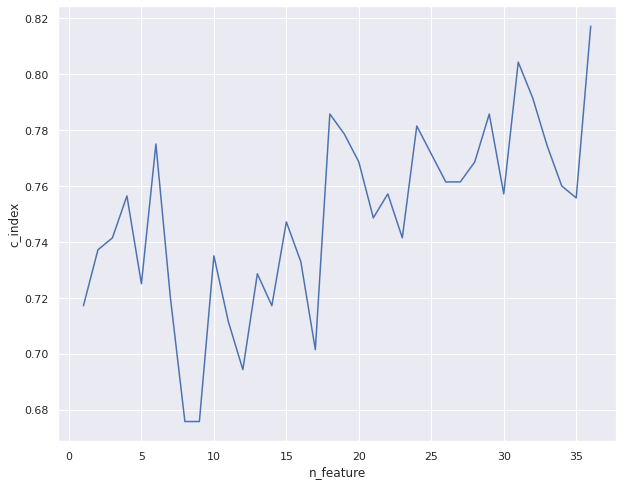

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression,mutual_info_regression,SelectPercentile
from sksurv.metrics import integrated_brier_score

n=0
rsf_c_index_list=[]

for c in range(1,len(feature.columns)+1):
  n+=1
  selectk=SelectKBest(f_regression,k=c)
  globals()["rsf_{}_list".format(c)]=[]

  selected=selectk.fit_transform(feature,label1)
  all_names = feature.columns
  ## selector.get_support()
  selected_mask = selectk.get_support()
  ## 선택된 특성(변수)들
  selected_names = all_names[selected_mask]
  ## 선택되지 않은 특성(변수)들
  unselected_names = all_names[~selected_mask]
  print('Selected names: ', selected_names)
  print('Unselected names: ', unselected_names)

  selected_feature=feature[selected_names]

  for i in range(1,100):
    n_estimators=i*5
                                                                 #n_estimator 중에서 best를 찾습니다.
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

1
Selected names:  Index(['Cortical_infarct'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol',
       'HDL', 'LDL', 'TG', 'smoking', 'alcohol', 'RoPE_score',
       'RoPE_score_5_scale', 'composite_coagulopathy', 'Plt_diagnosis',
       'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.5735714285714286
5
2
Selected names:  Index(['High_risk_PFO', 'RoPE_score'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'Beat', 'SEC', 'ASD', 'ASA', 'Closure', 'Athero',
       'Resting', 'Valsalva', 'd_dimer_num_diagnosis', 'oldest_d_dimer_num',
       'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol', 'HDL', 'LDL', 'TG',
       

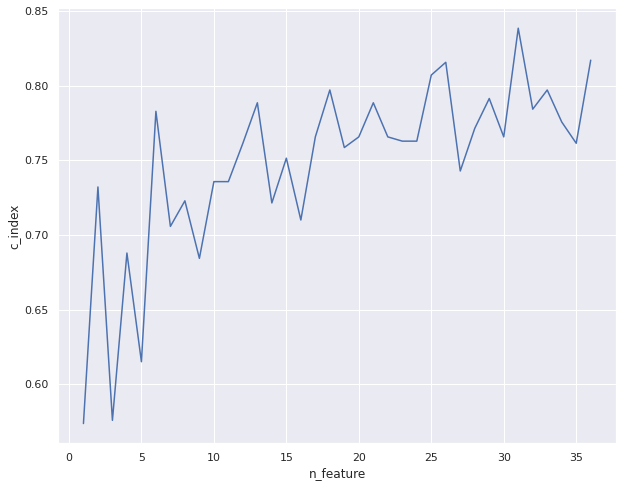

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression,mutual_info_regression,SelectPercentile,SelectFpr,SelectFdr
n=0
rsf_c_index_list=[]

for c in range(1,len(feature.columns)+1):
  n+=1
  selectk=SelectKBest(mutual_info_regression,k=c)
  globals()["rsf_{}_list".format(c)]=[]

  selected=selectk.fit_transform(feature,label1)
  all_names = feature.columns
  ## selector.get_support()
  selected_mask = selectk.get_support()
  ## 선택된 특성(변수)들
  selected_names = all_names[selected_mask]
  ## 선택되지 않은 특성(변수)들
  unselected_names = all_names[~selected_mask]
  print(n)
  print('Selected names: ', selected_names)
  print('Unselected names: ', unselected_names)

  selected_feature=feature[selected_names]

  for i in range(1,100):
    n_estimators=i*5
                                                                 #n_estimator 중에서 best를 찾습니다.
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

1
Selected names:  Index(['RoPE_score'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol',
       'HDL', 'LDL', 'TG', 'smoking', 'alcohol', 'Cortical_infarct',
       'RoPE_score_5_scale', 'composite_coagulopathy', 'Plt_diagnosis',
       'Hb_diagnosis', 'CRP_diagnosis'],
      dtype='object')
0.7171428571428572
55
2
Selected names:  Index(['RoPE_score', 'composite_coagulopathy'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol',


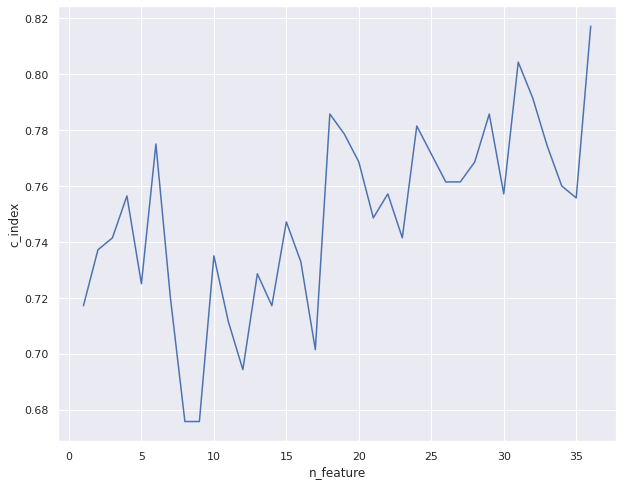

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression,mutual_info_regression,f_classif,SelectFpr,SelectFdr
n=0
rsf_c_index_list=[]

for c in range(1,len(feature.columns)+1):
  n+=1
  selectk=SelectKBest(f_classif, k=c)
  globals()["rsf_{}_list".format(c)]=[]
  selected=selectk.fit_transform(feature, label1)

  all_names = feature.columns
  ## selector.get_support()
  selected_mask = selectk.get_support()
  ## 선택된 특성(변수)들
  selected_names = all_names[selected_mask]
  ## 선택되지 않은 특성(변수)들
  unselected_names = all_names[~selected_mask]
  print(n)
  print('Selected names: ', selected_names)
  print('Unselected names: ', unselected_names)

  selected_feature=feature[selected_names]

  for i in range(1,100):
    n_estimators=i*5
                                                                 #n_estimator 중에서 best를 찾습니다.
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()

1
Selected names:  Index(['RoPE_score_5_scale'], dtype='object')
Unselected names:  Index(['Age', 'Sex', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive',
       'size', 'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA',
       'Closure', 'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'Chol',
       'HDL', 'LDL', 'TG', 'smoking', 'alcohol', 'Cortical_infarct',
       'RoPE_score', 'composite_coagulopathy', 'Plt_diagnosis', 'Hb_diagnosis',
       'CRP_diagnosis'],
      dtype='object')
0.665
5
2
Selected names:  Index(['Sex', 'Chol'], dtype='object')
Unselected names:  Index(['Age', 'Cancer', 'Etiology', 'AF_composite', 'PFO_positive', 'size',
       'Amt_TEE', 'High_risk_PFO', 'Beat', 'SEC', 'ASD', 'ASA', 'Closure',
       'Athero', 'Resting', 'Valsalva', 'd_dimer_num_diagnosis',
       'oldest_d_dimer_num', 'Homocysteine', 'HTN', 'DM', 'HbA1c', 'HDL',
       'LDL', 'TG', 'smoking', 'alcohol', 'Cort

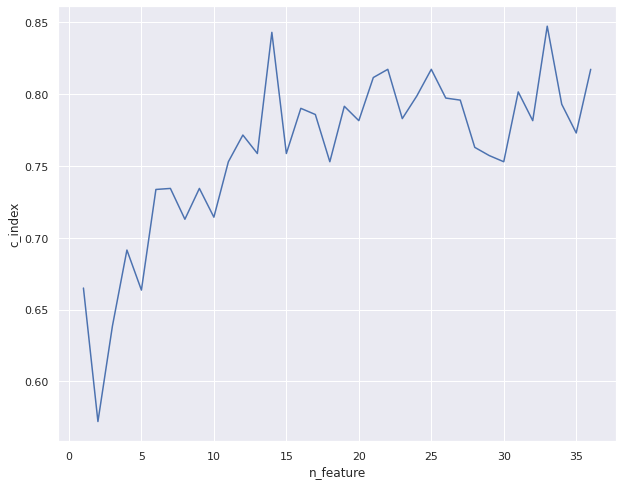

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression,mutual_info_regression,mutual_info_classif
n=0
rsf_c_index_list=[]

for c in range(1,len(feature.columns)+1):
  n+=1
  selectk=SelectKBest(mutual_info_classif,k=c)
  globals()["rsf_{}_list".format(c)]=[]

  selected=selectk.fit_transform(feature,label1)
  all_names = feature.columns
  ## selector.get_support()
  selected_mask = selectk.get_support()
  ## 선택된 특성(변수)들
  selected_names = all_names[selected_mask]
  ## 선택되지 않은 특성(변수)들
  unselected_names = all_names[~selected_mask]
  print(n)
  print('Selected names: ', selected_names)
  print('Unselected names: ', unselected_names)

  selected_feature=feature[selected_names]

  for i in range(1,100):
    n_estimators=i*5                       #n_estimator 중에서 best를 찾습니다.                                                      
    rsf=RandomSurvivalForest(max_depth=5, min_samples_split=10,min_samples_leaf=10,max_features='log2',n_jobs=-1,random_state=10)
    rsf.set_params(n_estimators=n_estimators)
    X_train,X_test,y_train,y_test=train_test_split(selected_feature,st_label,random_state=10,test_size=0.2)
    rsf.fit(X_train,y_train)
    rsf_c_index=rsf.score(X_test,y_test)
    globals()["rsf_{}_list".format(c)].append(rsf_c_index)
    globals()["rsf_{}_max".format(c)]=max(globals()["rsf_{}_list".format(c)])
  rsf_c_index_list.append(globals()["rsf_{}_max".format(c)])

  print(globals()["rsf_{}_max".format(c)])
  print((globals()["rsf_{}_list".format(c)].index(globals()["rsf_{}_max".format(c)])+1)*5)

  print('============================================================================================================================')

print(max(rsf_c_index_list), rsf_c_index_list.index(max(rsf_c_index_list))+1)

n_feature=np.arange(1,37)
plt.figure(figsize=(10,8))
plt.plot(n_feature, rsf_c_index_list)
plt.xlabel('n_feature')
plt.ylabel('c_index')
plt.show()